In [1]:
import pandas as pd
import numpy as np
import chardet
import re
import json
from json import loads, dumps
import os
import string
import neattext as nt
import neattext.functions as nfx 
from neattext import TextMetrics

In [2]:
df=pd.read_csv('CyclingDataPrep3.csv')

C:\Users\Cube\AppData\Local\Temp\ipykernel_23808\4101994537.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('CyclingDataPrep3.csv')


In [3]:
df

,Unnamed: 0,context_id,Question,Answer,Text
0,0,1.0,How do you take your bike with you if youre ri...,NaN,Every year cycling circles have thousands of b...
1,1,1.0,How do you take your bike with you if youre ri...,NaN,The quality of the products is very good but t...
2,2,1.0,How do you take your bike with you if youre ri...,NaN,Id love to get these products out to more peop...
3,3,1.0,How do you take your bike with you if youre ri...,NaN,How do I take my bike with me if Im riding acr...
4,4,1.0,How do you take your bike with you if youre ri...,NaN,The next best option is to sling the bike fram...
...,...,...,...,...,...
172145,175429,22887.0,Seatpost 300mm diameter not Selcof,NaN,Check the yellow pages under telephone poles
172146,175430,22887.0,Seatpost 300mm diameter not Selcof,NaN,If you mean 316mm check out Ritchey
172147,175431,22887.0,Seatpost 300mm diameter not Selcof,NaN,Easton EC90 Zero EC70 Zero EC90 EC70 Bontrage...
172148,175432,22888.0,What do you think the wholesale is on this bike,NaN,A Scott Cr1 Pro 2005 with full Ultegra Usually...


In [4]:
df=df.drop(columns=['Unnamed: 0','context_id'])

In [5]:
delete_RowsB=df[df['Text'].str.len() <= 30].index

In [6]:
df.drop(delete_RowsB , inplace=True)

In [7]:
df.drop(df[df['Text']==""].index, inplace = True)

In [9]:
# df.drop(df.index[36:45], inplace=True)

In [15]:
# df.drop(df.index[298:307], inplace=True)

In [8]:
df

,Question,Answer,Text
0,How do you take your bike with you if youre ri...,NaN,Every year cycling circles have thousands of b...
1,How do you take your bike with you if youre ri...,NaN,The quality of the products is very good but t...
2,How do you take your bike with you if youre ri...,NaN,Id love to get these products out to more peop...
3,How do you take your bike with you if youre ri...,NaN,How do I take my bike with me if Im riding acr...
4,How do you take your bike with you if youre ri...,NaN,The next best option is to sling the bike fram...
...,...,...,...
172145,Seatpost 300mm diameter not Selcof,NaN,Check the yellow pages under telephone poles
172146,Seatpost 300mm diameter not Selcof,NaN,If you mean 316mm check out Ritchey
172147,Seatpost 300mm diameter not Selcof,NaN,Easton EC90 Zero EC70 Zero EC90 EC70 Bontrage...
172148,What do you think the wholesale is on this bike,NaN,A Scott Cr1 Pro 2005 with full Ultegra Usually...


In [ ]:
# df['context_id']= pd.factorize(df['Question'])[0] + 1

In [9]:
df.to_csv('CyclingDataPrep2.csv')

In [10]:
df.columns

Index(['Question', 'Answer', 'Text'], dtype='object')

In [11]:
df['Question']=df['Question'].astype('string')
df['Answer']=df['Answer'].astype('string')
df['Text']=df['Text'].astype('string')

In [12]:
#remove names
df['Question']=df['Question'].apply(nfx.remove_special_characters)
df['Question']=df['Question'].apply(nfx.remove_emojis)
df['Question']=df['Question'].apply(nfx.remove_non_ascii)
df['Question']=df['Question'].apply(nfx.remove_punctuations)
#Remove the time pattern with Ex: 07:35 am
# df['Question']=df['Question'].apply(lambda x:nfx.remove_custom_pattern(x,term_pattern=r'((1[0-2]|0?[1-9]):([0-5][0-9]) ?([AaPp][Mm]))'))
#Remove the date formate: 2001-11-30
# df['Question']=df['Question'].apply(lambda x:nfx.remove_custom_pattern(x,term_pattern=r'/^[0-9]{4}-(((0[13578]|(10|12))-(0[1-9]|[1-2][0-9]|3[0-1]))|(02-(0[1-9]|[1-2][0-9]))|((0[469]|11)-(0[1-9]|[1-2][0-9]|30)))$/'))

TypeError: expected string or bytes-like object

In [ ]:
# df.to_csv('CyclingDataPrep2.csv')

In [13]:
df.isnull().sum()

Question         9
Answer      172063
Text             1
dtype: int64

In [14]:
df['Question']=df['Question'].dropna()

In [15]:
df

,Question,Answer,Text
0,How do you take your bike with you if youre ri...,<NA>,Every year cycling circles have thousands of b...
1,How do you take your bike with you if youre ri...,<NA>,The quality of the products is very good but t...
2,How do you take your bike with you if youre ri...,<NA>,Id love to get these products out to more peop...
3,How do you take your bike with you if youre ri...,<NA>,How do I take my bike with me if Im riding acr...
4,How do you take your bike with you if youre ri...,<NA>,The next best option is to sling the bike fram...
...,...,...,...
172145,Seatpost 300mm diameter not Selcof,<NA>,Check the yellow pages under telephone poles
172146,Seatpost 300mm diameter not Selcof,<NA>,If you mean 316mm check out Ritchey
172147,Seatpost 300mm diameter not Selcof,<NA>,Easton EC90 Zero EC70 Zero EC90 EC70 Bontrage...
172148,What do you think the wholesale is on this bike,<NA>,A Scott Cr1 Pro 2005 with full Ultegra Usually...


In [16]:
df.isnull().sum()

Question         9
Answer      172063
Text             1
dtype: int64

In [27]:
df

0         Every year cycling circles have thousands of b...
1         The quality of the products is very good but t...
2         Id love to get these products out to more peop...
3         How do I take my bike with me if Im riding acr...
4         The next best option is to sling the bike fram...
                                ...                        
172145         Check the yellow pages under telephone poles
172146                  If you mean 316mm check out Ritchey
172147    Easton EC90 Zero EC70 Zero EC90  EC70 Bontrage...
172148    A Scott Cr1 Pro 2005 with full Ultegra Usually...
172149    Apparently the average profit margin on a bike...
Name: Text, Length: 172131, dtype: string

In [22]:
#noise scan
df['Text'].apply(lambda x:nt.TextFrame(x).noise_scan())

AttributeError: 'NAType' object has no attribute 'lower'

In [ ]:
dir(nfx)

In [ ]:
nfx.STOPWORDS_en

In [ ]:
df['Text'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())


In [ ]:
# df['nsContex']=df['CleanAnswer'].apply(lambda x:nt.TextFrame(x).remove_stopwords())

In [ ]:
# result=df.to_json('cyclingData.json',orient="records")
# parsed = loads(result)
# dumps(parsed, indent=4)

In [17]:
import pandas as pd
import numpy as np
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
print("Number of question and answers: ", len(df))

Number of question and answers:  172150


In [19]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
random_num = np.random.randint(0,len(df))
question = df['Question'][random_num]
text = df["Text"][random_num]

In [46]:
print(question, "\n", text)

Researching for new road bike 
 Ive had my 2005 F65 for a year now Ive ridden probably 100 miles per week since I got it and although I am pleased with it I have had some problems  Bottom Bracket failed miserably within 6 months sorted on warranty  Rear hub bearings again failed sorted on warranty The new rear wheel they sent me turned quite tightly hmm  stemhandlebar bolts corroding I found it difficult when buying this bike to differentiate all within this price bracket seeing as they all shared similar wheelsetgroupsets etc I supposed it must be the frame and the Felt was specforspec about 200 less than similar Treks Giants and Specializeds


Tokenize the question and text as a pair

In [47]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 137 tokens.


In [48]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
for token, id in zip(tokens, input_ids):
    print('{:15} {:15,}'.format(token,id))
    if id == tokenizer.sep_token_id:
        print('')

[CLS]                       101
researching              20,059
for                       2,005
new                       2,047
road                      2,346
bike                      7,997
[SEP]                       102

iv                        4,921
##e                       2,063
had                       2,018
my                        2,026
2005                      2,384
f                         1,042
##65                     26,187
for                       2,005
a                         1,037
year                      2,095
now                       2,085
iv                        4,921
##e                       2,063
ridden                   15,230
probably                  2,763
100                       2,531
miles                     2,661
per                       2,566
week                      2,733
since                     2,144
i                         1,045
got                       2,288
it                        2,009
and                       1,998
althoug

In [49]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

6
7
130
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [50]:
# Run our example through the model.
start_scores, end_scores = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                 token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text


In [51]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print("SEP token index: ", sep_idx)#number of tokens in segment A (question) - this will be one more than the sep_idx as the index in Python starts from 0
num_seg_a = sep_idx+1
print("Number of tokens in segment A: ", num_seg_a)#number of tokens in segment B (text)
num_seg_b = len(input_ids) - num_seg_a
print("Number of tokens in segment B: ", num_seg_b)#creating the segment ids
segment_ids = [0]*num_seg_a + [1]*num_seg_b#making sure that every input token has a segment id
assert len(segment_ids) == len(input_ids)

SEP token index:  6
Number of tokens in segment A:  7
Number of tokens in segment B:  130


In [52]:
#token input_ids to represent the input and token segment_ids to differentiate our segments - question and text
output = model(torch.tensor([input_ids]),  token_type_ids=torch.tensor([segment_ids]))

In [53]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)

In [54]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
Ive had my 2005 f65 for a year now ive ridden probably 100 miles per week since i got it and although i am pleased with it i have had some problems  bottom bracket failed miserably within 6 months sorted on warranty  rear hub bearings again failed sorted on warranty the new rear wheel they sent me turned quite tightly hmm  stemhandlebar bolts corroding i found it difficult when buying this bike to differentiate all within this price bracket seeing as they all shared similar wheelsetgroupsets etc i supposed it must be the frame and the felt was specforspec about 200 less than similar treks giants and specializeds

Question:
Researching for new road bike

Answer:
2005 f ##65.


Visualization of the tokens

In [55]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

In [56]:
print(len(token_labels))

137


C:\Users\Cube\AppData\Local\Temp\ipykernel_23808\1211519200.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.u

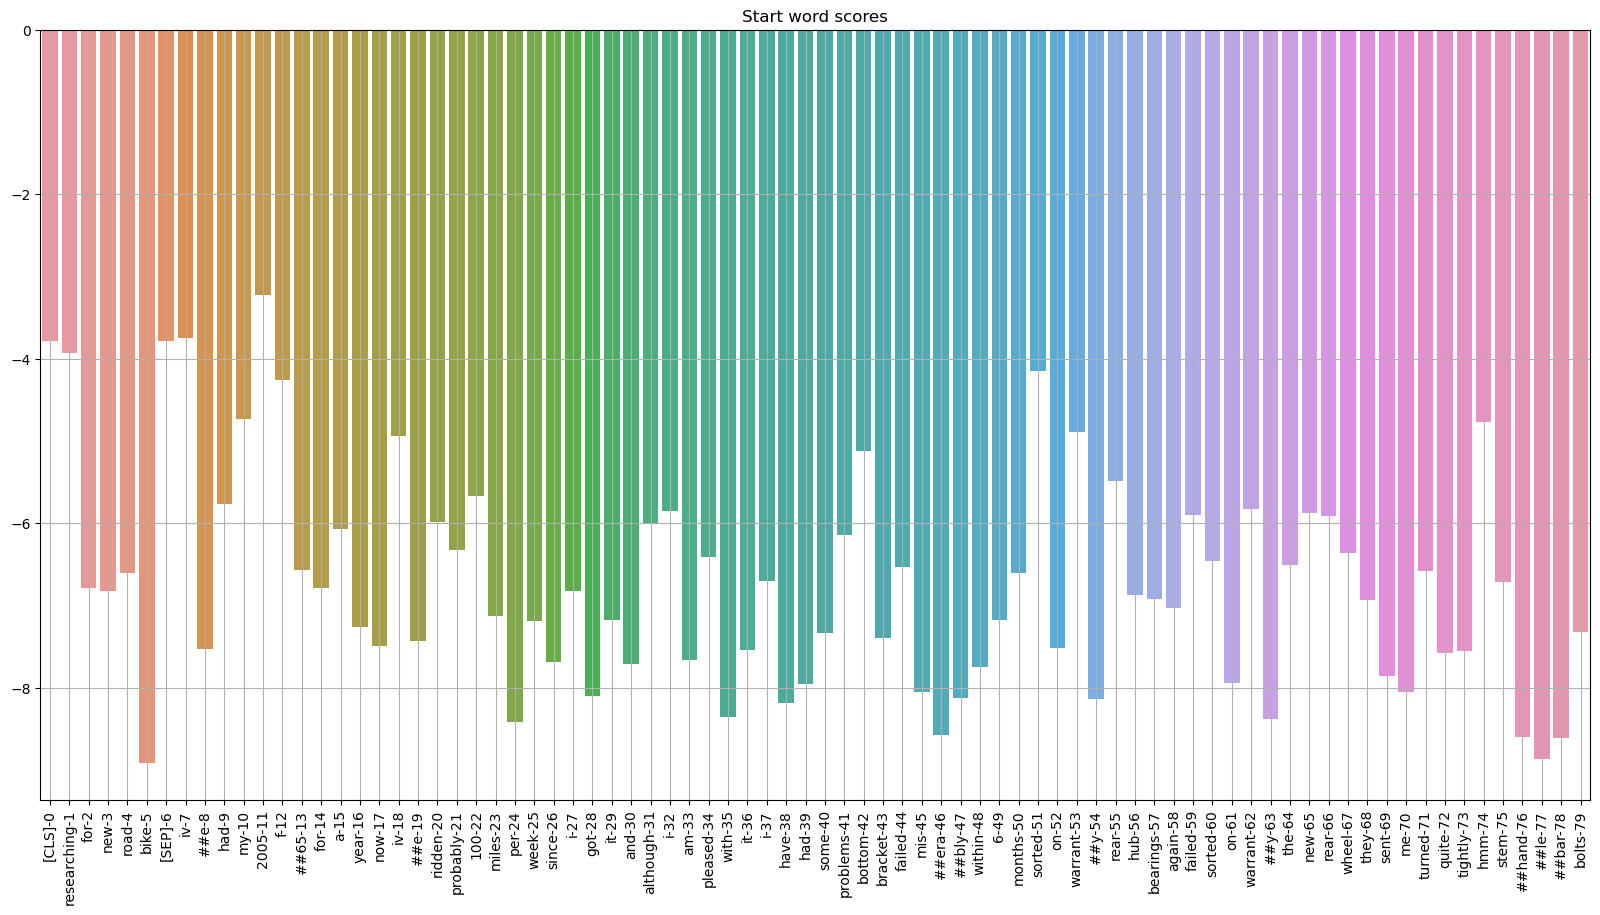

In [57]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

C:\Users\Cube\AppData\Local\Temp\ipykernel_23808\3260309576.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd

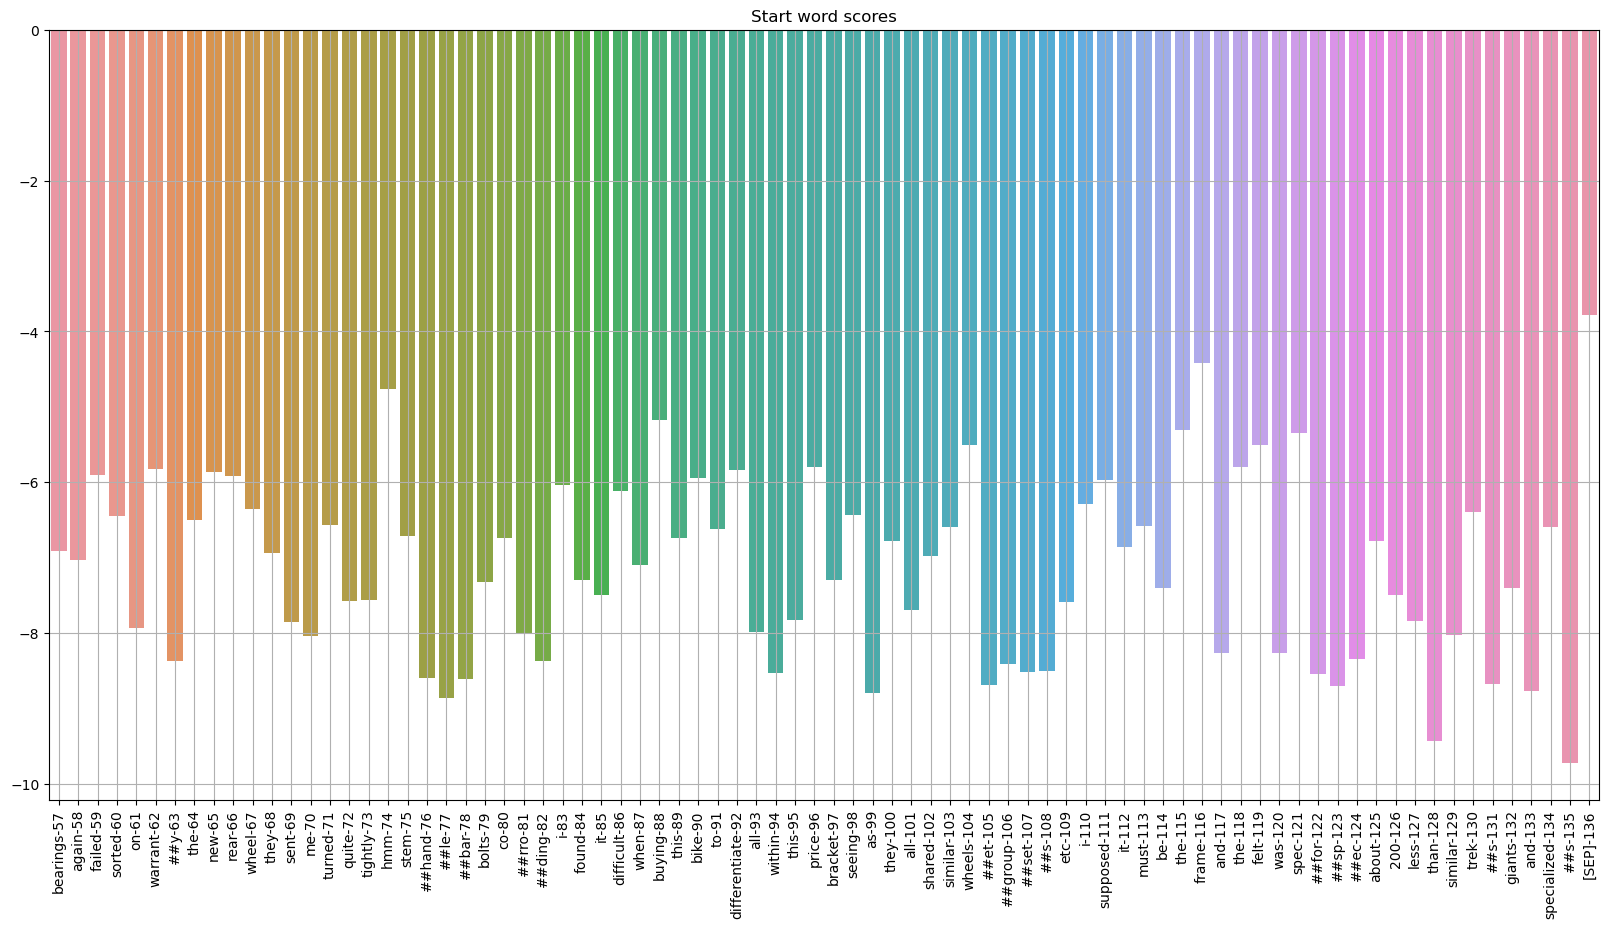

In [58]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()



C:\Users\Cube\AppData\Local\Temp\ipykernel_23808\1612526589.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cube\anaconda3\envs\gpu2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.u

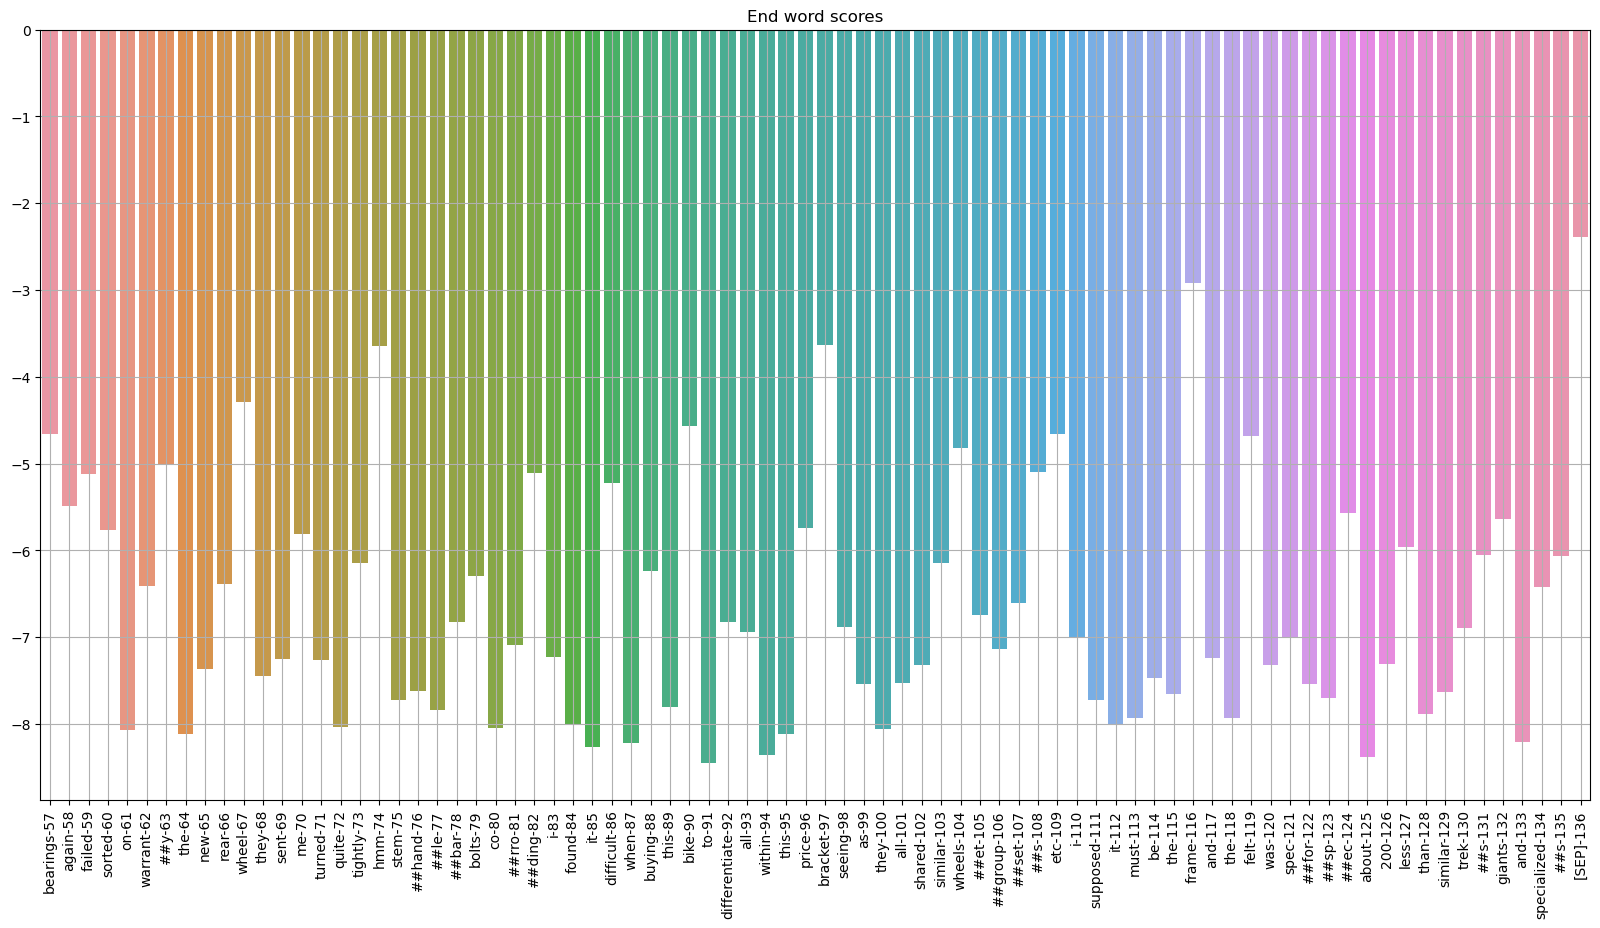

In [59]:


#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()



Combine the scatter words 

In [60]:
answer = tokens[answer_start]
for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

Funtion: Question-Answering process into a function

In [61]:
def question_answer(question, text):
    
   #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [73]:
text = """Thought folks here might be interested My latest iPhone App called BikeSmart is now available on the App store BikeSmart version 101 is the best way to view your Garmin Connecta activities on your mobile device a You can view ride details like distance time energy power speed elevation heart rate and cadence a There are also views which show ride maps and interactive charts for speed elevation distance and heart rate a More charts show distance average speed time and elevation for rides my week month and year a The totals page compares information for this week last week this month last month and this year and last year a The personal best information shows your personal best for fastest longest largest ascent max energy etc Check it out"""
question = "What are the apps for cycling route purposes?"
question_answer(question, text)


Answer:
Bikesmart


In [74]:
print("Original answer:\n", df.loc[df["Question"] == question]["Answer"].values[0])

Original answer:
 App called BikeSmart is now available on the App store BikeSmart version 101 is the best way to view your Garmin Connecta activities on your mobile device


In [75]:
text = """Cycling is a form of aerobic exercise that can provide a number of health benefits including Improved cardiovascular fitness Regular cycling can help to strengthen your heart and lungs lower your risk of heart disease and improve your overall cardiovascular fitness Increased muscle strength and flexibility Cycling can help to tone your leg muscles as well as improve your flexibility and balance Weight management Cycling burns calories which can help you maintain a healthy weight or lose weight if you need to Reduced stress Riding a bike can be a relaxing and enjoyable activity that can help to reduce stress and improve your overall wellbeing Improved mental health Regular cycling can help to improve your mood and reduce the risk of depression and anxiety Lowimpact exercise Cycling is a lowimpact form of exercise which means it is easy on your joints and less likely to cause injury compared to some other forms of exercise"""
question = "What are Health benefits of cycling?"
question_answer(question, text)


Answer:
Improved cardiovascular fitness


In [76]:
print("Original answer:\n", df.loc[df["Question"] == question]["Answer"].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [72]:
print(question)


Playing with the chatbot
Citation: 

In [81]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
 If you have to ask youll probably be happiest with Shimano SPD pedals You dont have enough experience to be fussy I just put some on my commuter and I couldnt be happier   if I was an allmountain hardman Id want something different but    Any shoe with a 2 bolt cleat interface looks like 4 bolts because there are two positions and a walking sole will do Go for fit application and budget in that order Application means dont get XC racing shoes if youre out for recreational riding

Please enter your question: 
 What are the budget friendly clipless pedals and shoes ?



Answer:
Shimano spd pedals you dont have enough experience to be fussy i just put some on my commuter and i couldnt be happier if i was an allmountain hardman id want something different but any shoe with a 2 bolt cleat interface looks like 4 bolts because there are two positions and a walking sole will do go for fit application and budget in that order application means dont get xc racing shoes



Do you want to ask another question based on this text (Y/N)?  N



Bye!
